In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16,10)})

In [129]:
mt = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/mt_gpt2-ft_all.csv')
len(mt)


8001

In [130]:
mt_info = mt.loc[mt['move_type'].isin(['instruct', 'explain', 'check', 'query_yn', 'reply_w', 'clarify'])]
len(mt_info)


3708

## Contextual unit: dialogue
### With and without backchannels, with and without role separation, H(S) H(S|C) I(S;C)

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_56407/3789294607.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = mt_.groupby('position_in_dialogue').mean()
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_56407/3789294607.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = mt_info_.groupby('position_in_dialogue').mean()
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_56407/3789294607.py:76: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify

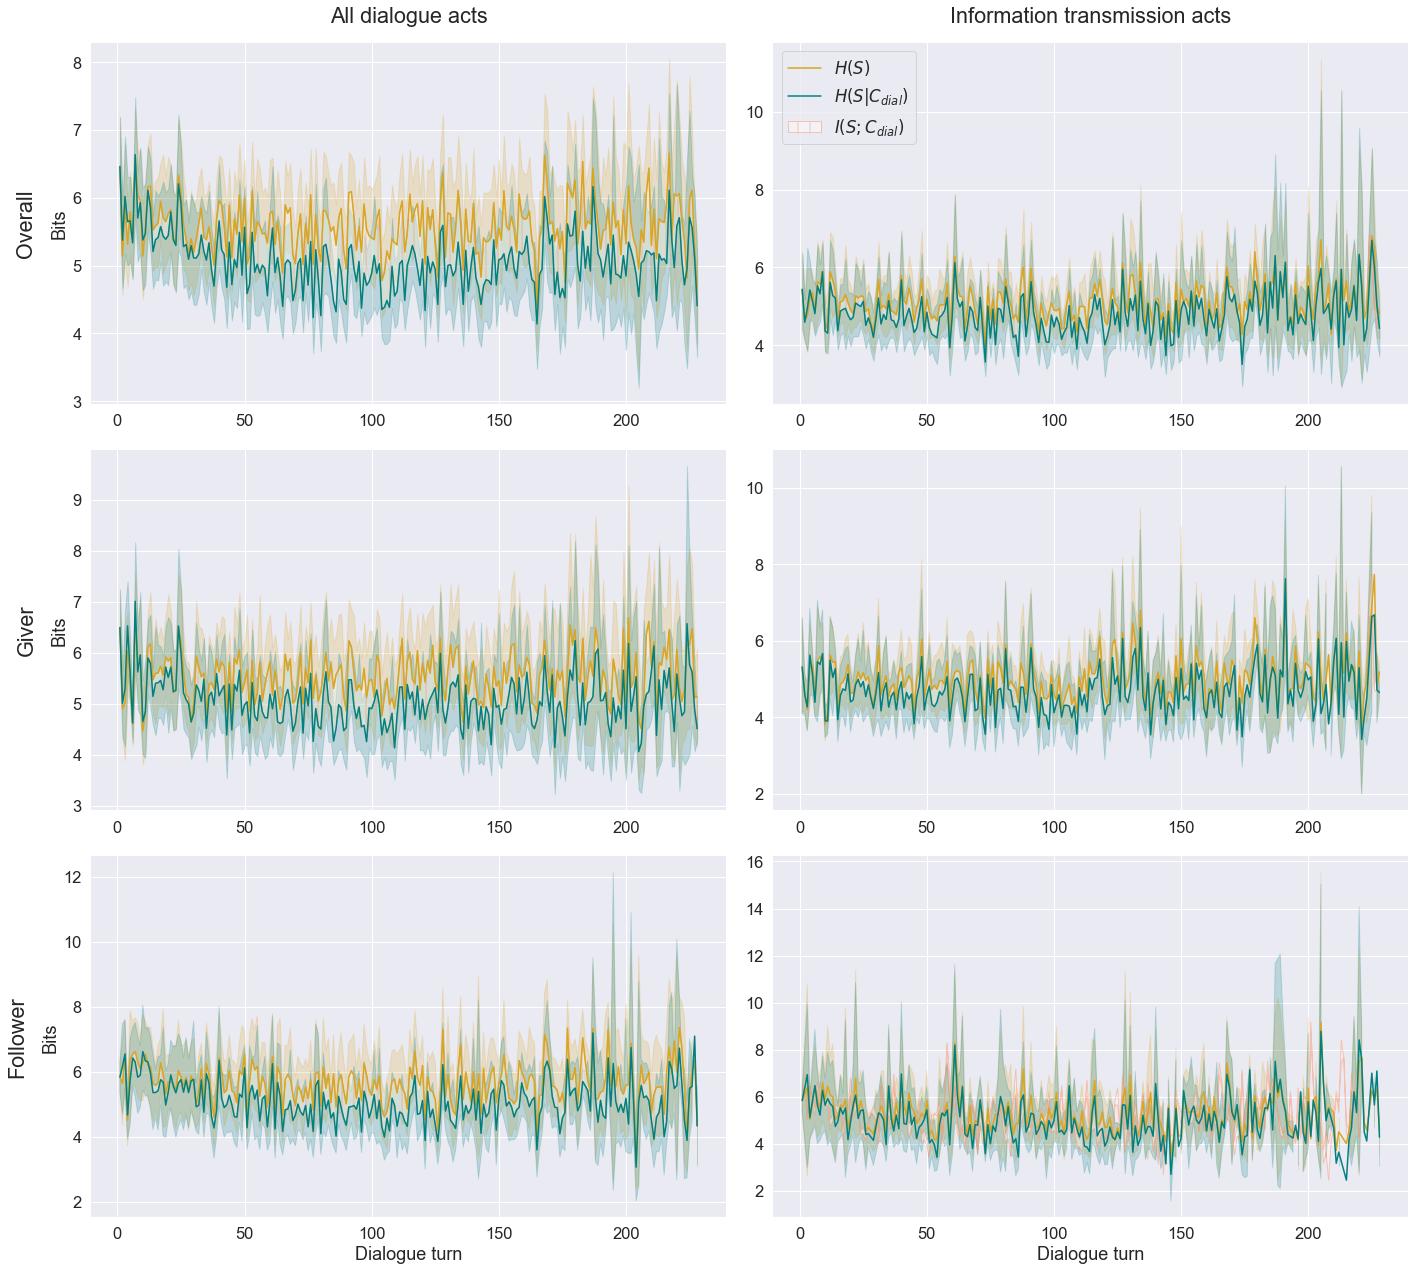

In [136]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Limit plot size by removing last positions
max_pos = math.ceil(
    mt['position_in_dialogue'].mean() + mt['position_in_dialogue'].std() * 1
)
# print(max_pos)
mt_ = mt[mt["position_in_dialogue"] <= max_pos]
mt_info_ = mt_info[mt_info["position_in_dialogue"] <= max_pos]
mt_giver = mt_[mt_['speaker'] == 'g']
mt_follower = mt_[mt_['speaker'] == 'f']
mt_info_giver = mt_info_[mt_info_['speaker'] == 'g']
mt_info_follower = mt_info_[mt_info_['speaker'] == 'f']


# Set up figure
cols = ["All dialogue acts", "Information transmission acts"]
rows = ["Overall", "Giver", "Follower"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)


# 0,0: all dialogue acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,0], label='$H(S)$')

sns.lineplot(data=mt_,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[0,0], label='$H(S|C_{dial})$')

means_df = mt_.groupby('position_in_dialogue').mean()
axes[0,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 0,1: Information transmission acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_info_,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,1], label='$H(S)$')

sns.lineplot(data=mt_info_,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[0,1], label='$H(S|C_{dial})$')

means_df = mt_info_.groupby('position_in_dialogue').mean()
axes[0,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 1,0: all dialogue acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_giver,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[1,0], label='$H(S)$')

sns.lineplot(data=mt_giver,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[1,0], label='$H(S|C_{dial})$')

means_df = mt_giver.groupby('position_in_dialogue').mean()
axes[1,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 1,1: Information transmission acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_info_giver,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[1,1], label='$H(S)$')

sns.lineplot(data=mt_info_giver,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[1,1], label='$H(S|C_{dial})$')

means_df = mt_info_giver.groupby('position_in_dialogue').mean()
axes[1,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 2,0: all dialogue acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_follower,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[2,0], label='$H(S)$')

sns.lineplot(data=mt_follower,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[2,0], label='$H(S|C_{dial})$')

means_df = mt_follower.groupby('position_in_dialogue').mean()
axes[2,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )

# 2,1: Information transmission acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_info_follower,
             x="position_in_dialogue", y="normalised_h", legend=False, color='goldenrod', ax=axes[2,1], label='$H(S)$')

sns.lineplot(data=mt_info_follower,
             x="position_in_dialogue", y="normalised_h_dialogue_id", legend=False, color='teal', ax=axes[2,1], label='$H(S|C_{dial})$')

means_df = mt_info_follower.groupby('position_in_dialogue').mean()
axes[2,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{dial})$'
                )


# Set labels for whole figure
axes[2,0].set_xlabel("Dialogue turn")
axes[2,1].set_xlabel("Dialogue turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")
axes[2,0].set_ylabel("Bits")
for i in range(3):
    axes[i, 1].set_ylabel("")
for i in range(2):
    axes[0, i].set_xlabel("")
    axes[1, i].set_xlabel("")

axes[0,1].legend(loc='upper left')

# fig = sns_plot.get_figure()

# sns_plot.set_xticks(np.arange(0, max_pos, 50))

sns.despine(left=True)
plt.tight_layout()
plt.show()


### With and without backchannels, with and without role separation, I(S;C) only

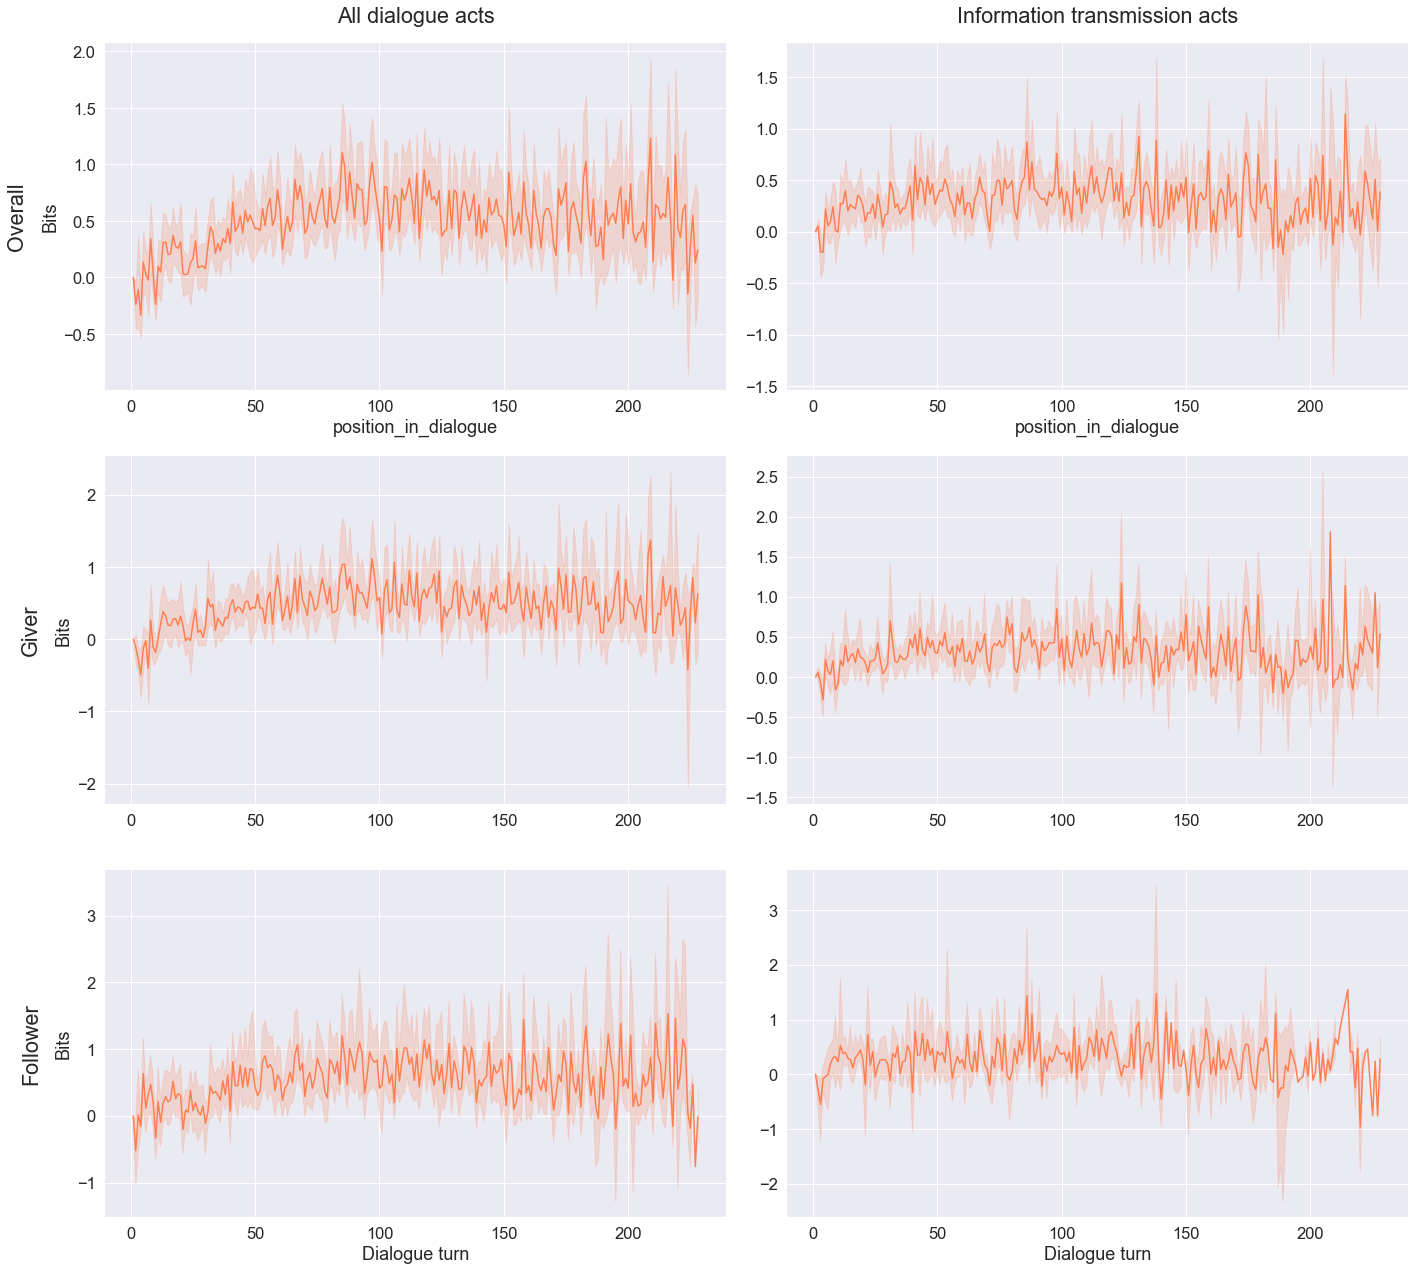

In [132]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)


# Set up figure
cols = ["All dialogue acts", "Information transmission acts"]
rows = ["Overall", "Giver", "Follower"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)


# 0,0: all dialogue acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[0,0], label='$I(S;C_{dial})$')


# 0,1: Information transmission acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_info_,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[0,1], label='$I(S;C_{dial})$')


# 1,0: all dialogue acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_giver,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[1,0], label='$I(S;C_{dial})$')


# 1,1: Information transmission acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_info_giver,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[1,1], label='$I(S;C_{dial})$')


# 2,0: all dialogue acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_follower,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[2,0], label='$I(S;C_{dial})$')


# 2,1: Information transmission acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_info_follower,
             x="position_in_dialogue", y="mi_dialogue_id", legend=False, color='coral', ax=axes[2,1], label='$I(S;C_{dial})$')


# Set labels for whole figure
axes[2,0].set_xlabel("Dialogue turn")
axes[2,1].set_xlabel("Dialogue turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")
axes[2,0].set_ylabel("Bits")
for i in range(3):
    axes[i, 1].set_ylabel("")
for i in range(2):
    axes[1, i].set_xlabel("")



# fig = sns_plot.get_figure()

# sns_plot.set_xticks(np.arange(0, max_pos, 50))

sns.despine(left=True)
plt.tight_layout()
plt.show()


## Contextual unit: transaction
### With and without backchannels, with and without role separation, H(S) H(S|C) I(S;C)

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_56407/44569805.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = mt_.groupby('position_in_transaction').mean()
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_56407/44569805.py:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = mt_info_.groupby('position_in_transaction').mean()
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_56407/44569805.py:75: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify

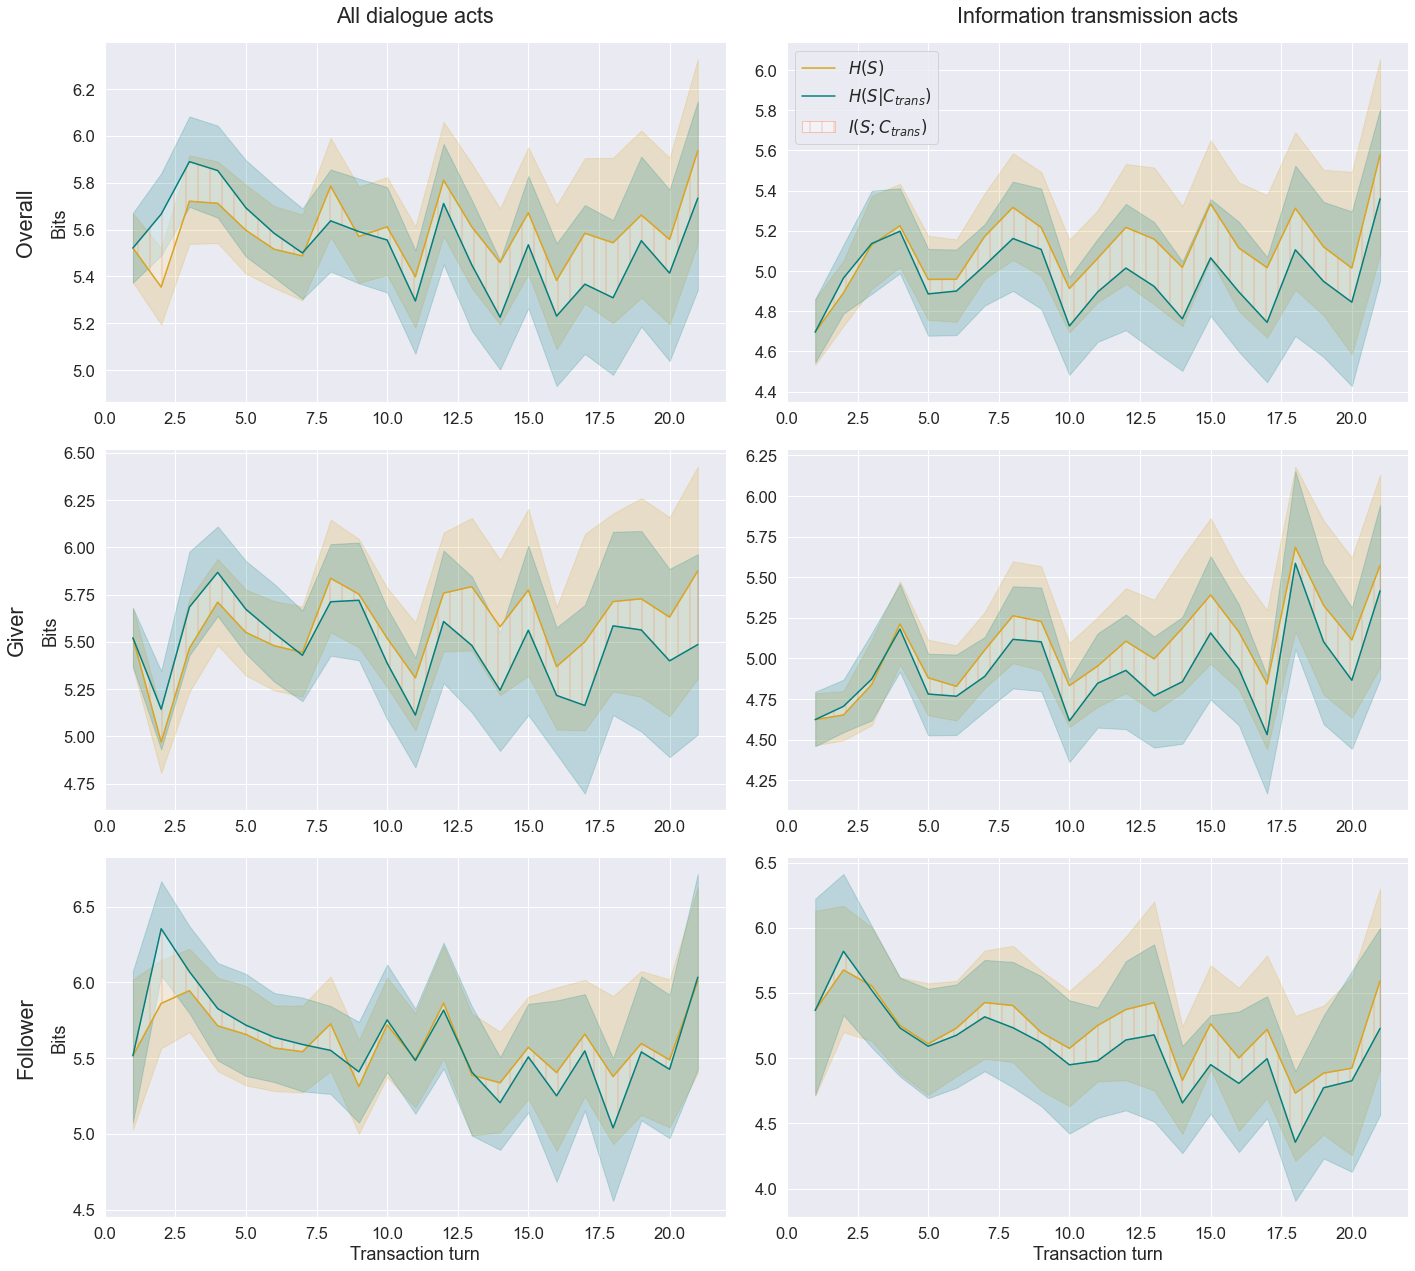

In [137]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Limit plot size by removing last positions
max_pos = math.ceil(
    mt['position_in_transaction'].mean() + mt['position_in_transaction'].std() * 1
)
# print(max_pos)
mt_ = mt[mt["position_in_transaction"] <= max_pos]
mt_info_ = mt_info[mt_info["position_in_transaction"] <= max_pos]
mt_giver = mt_[mt_['speaker'] == 'g']
mt_follower = mt_[mt_['speaker'] == 'f']
mt_info_giver = mt_info_[mt_info_['speaker'] == 'g']
mt_info_follower = mt_info_[mt_info_['speaker'] == 'f']

# Set up figure
cols = ["All dialogue acts", "Information transmission acts"]
rows = ["Overall", "Giver", "Follower"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)


# 0,0: all dialogue acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_,
             x="position_in_transaction", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,0], label='$H(S)$')

sns.lineplot(data=mt_,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, color='teal', ax=axes[0,0], label='$H(S|C_{trans})$')

means_df = mt_.groupby('position_in_transaction').mean()
axes[0,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{trans})$'
                )

# 0,1: Information transmission acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_info_,
             x="position_in_transaction", y="normalised_h", legend=False, color='goldenrod', ax=axes[0,1], label='$H(S)$')

sns.lineplot(data=mt_info_,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, color='teal', ax=axes[0,1], label='$H(S|C_{trans})$')

means_df = mt_info_.groupby('position_in_transaction').mean()
axes[0,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{trans})$'
                )

# 1,0: all dialogue acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_giver,
             x="position_in_transaction", y="normalised_h", legend=False, color='goldenrod', ax=axes[1,0], label='$H(S)$')

sns.lineplot(data=mt_giver,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, color='teal', ax=axes[1,0], label='$H(S|C_{trans})$')

means_df = mt_giver.groupby('position_in_transaction').mean()
axes[1,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{trans})$'
                )

# 1,1: Information transmission acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_info_giver,
             x="position_in_transaction", y="normalised_h", legend=False, color='goldenrod', ax=axes[1,1], label='$H(S)$')

sns.lineplot(data=mt_info_giver,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, color='teal', ax=axes[1,1], label='$H(S|C_{trans})$')

means_df = mt_info_giver.groupby('position_in_transaction').mean()
axes[1,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{trans})$'
                )


# 2,0: all dialogue acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_follower,
             x="position_in_transaction", y="normalised_h", legend=False, color='goldenrod', ax=axes[2,0], label='$H(S)$')

sns.lineplot(data=mt_follower,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, color='teal', ax=axes[2,0], label='$H(S|C_{trans})$')

means_df = mt_follower.groupby('position_in_transaction').mean()
axes[2,0].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{trans})$'
                )

# 2,1: Information transmission acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_info_follower,
             x="position_in_transaction", y="normalised_h", legend=False, color='goldenrod', ax=axes[2,1], label='$H(S)$')

sns.lineplot(data=mt_info_follower,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, color='teal', ax=axes[2,1], label='$H(S|C_{trans})$')

means_df = mt_info_follower.groupby('position_in_transaction').mean()
axes[2,1].fill_between(range(1, len(means_df) + 1),
                 means_df['normalised_h'],
                 means_df['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C_{trans})$'
                )


# Set labels for whole figure
axes[2,0].set_xlabel("Transaction turn")
axes[2,1].set_xlabel("Transaction turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")
axes[2,0].set_ylabel("Bits")
for i in range(3):
    axes[i, 1].set_ylabel("")
for i in range(2):
    axes[0, i].set_xlabel("")
    axes[1, i].set_xlabel("")

axes[0,1].legend(loc='upper left')

# fig = sns_plot.get_figure()

# sns_plot.set_xticks(np.arange(0, max_pos, 50))

sns.despine(left=True)
plt.tight_layout()
plt.show()


### With and without backchannels, with and without role separation, I(S;C) only

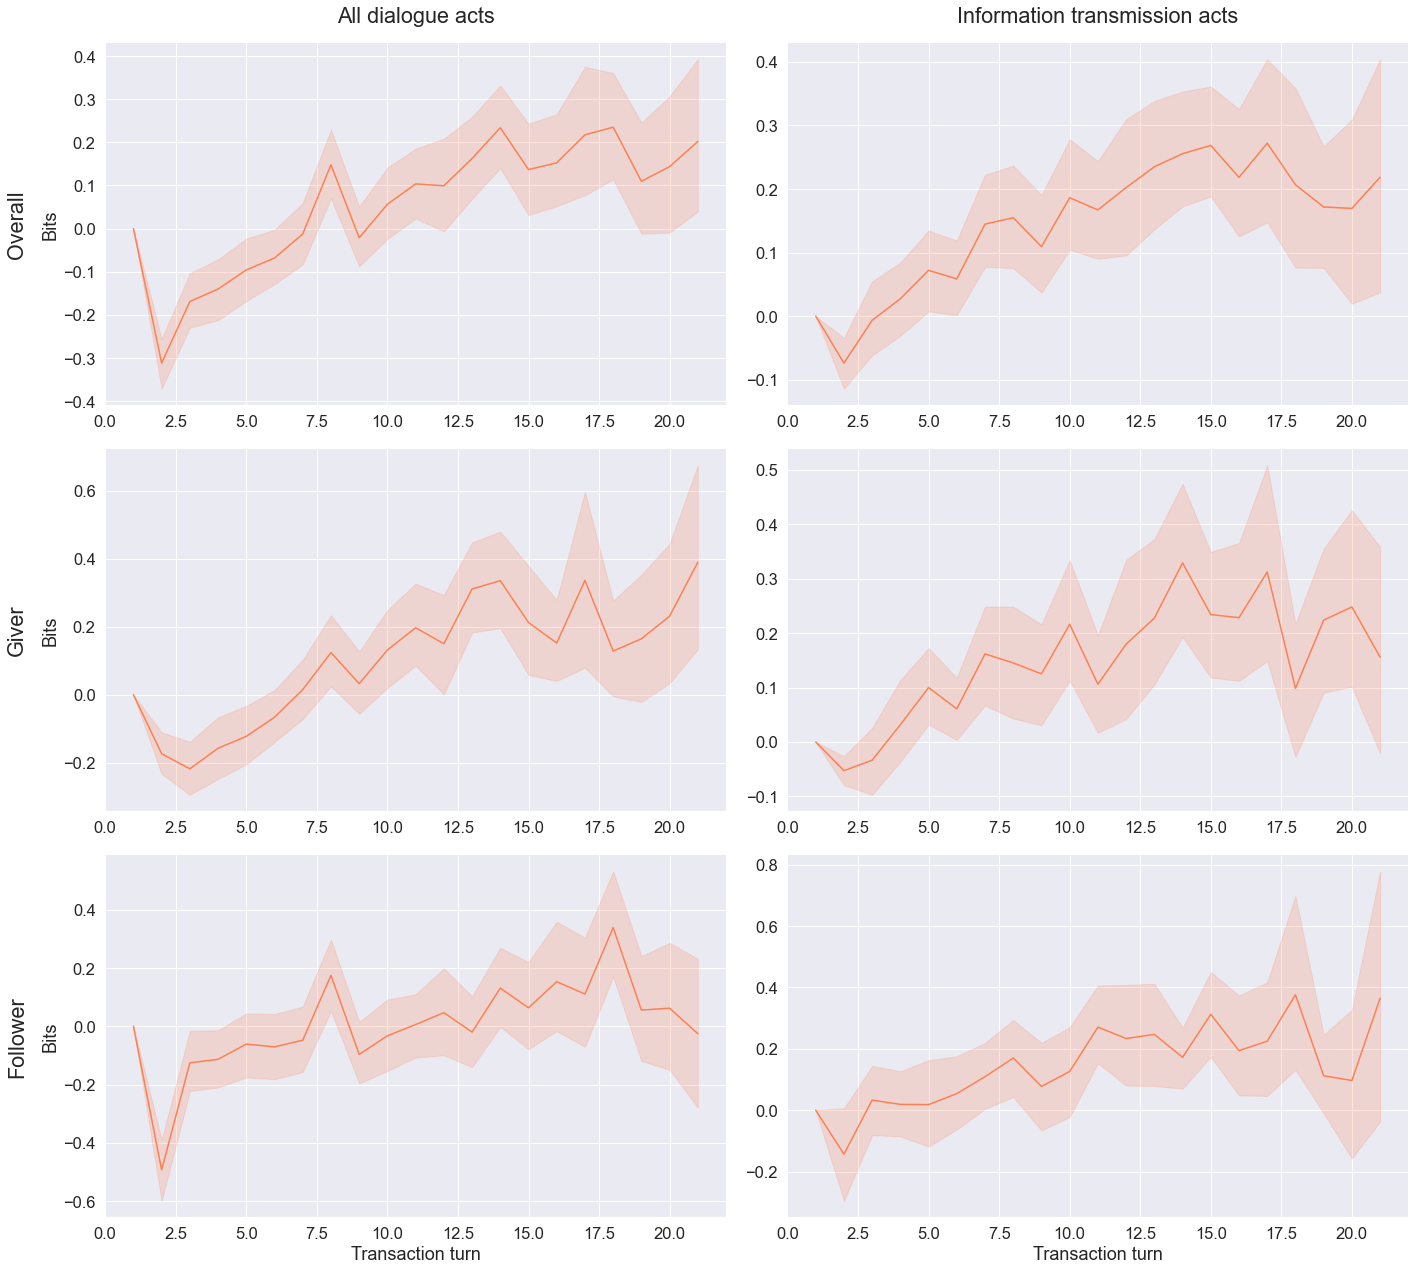

In [138]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)


# Set up figure
cols = ["All dialogue acts", "Information transmission acts"]
rows = ["Overall", "Giver", "Follower"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)


# 0,0: all dialogue acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_,
             x="position_in_transaction", y="mi_transaction_number", legend=False, color='coral', ax=axes[0,0], label='$I(S;C_{trans})$')


# 0,1: Information transmission acts, roles aggregate
# ---------------------------------------------
sns.lineplot(data=mt_info_,
             x="position_in_transaction", y="mi_transaction_number", legend=False, color='coral', ax=axes[0,1], label='$I(S;C_{trans})$')


# 1,0: all dialogue acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_giver,
             x="position_in_transaction", y="mi_transaction_number", legend=False, color='coral', ax=axes[1,0], label='$I(S;C_{trans})$')


# 1,1: Information transmission acts, giver
# ---------------------------------------------
sns.lineplot(data=mt_info_giver,
             x="position_in_transaction", y="mi_transaction_number", legend=False, color='coral', ax=axes[1,1], label='$I(S;C_{trans})$')


# 2,0: all dialogue acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_follower,
             x="position_in_transaction", y="mi_transaction_number", legend=False, color='coral', ax=axes[2,0], label='$I(S;C_{trans})$')


# 2,1: Information transmission acts, follower
# ---------------------------------------------
sns.lineplot(data=mt_info_follower,
             x="position_in_transaction", y="mi_transaction_number", legend=False, color='coral', ax=axes[2,1], label='$I(S;C_{trans})$')


# Set labels for whole figure
axes[2,0].set_xlabel("Transaction turn")
axes[2,1].set_xlabel("Transaction turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")
axes[2,0].set_ylabel("Bits")
for i in range(3):
    axes[i, 1].set_ylabel("")
for i in range(2):
    axes[0, i].set_xlabel("")
    axes[1, i].set_xlabel("")



# fig = sns_plot.get_figure()

# sns_plot.set_xticks(np.arange(0, max_pos, 50))

sns.despine(left=True)
plt.tight_layout()
plt.show()


### Zoom in on giver vs. follower

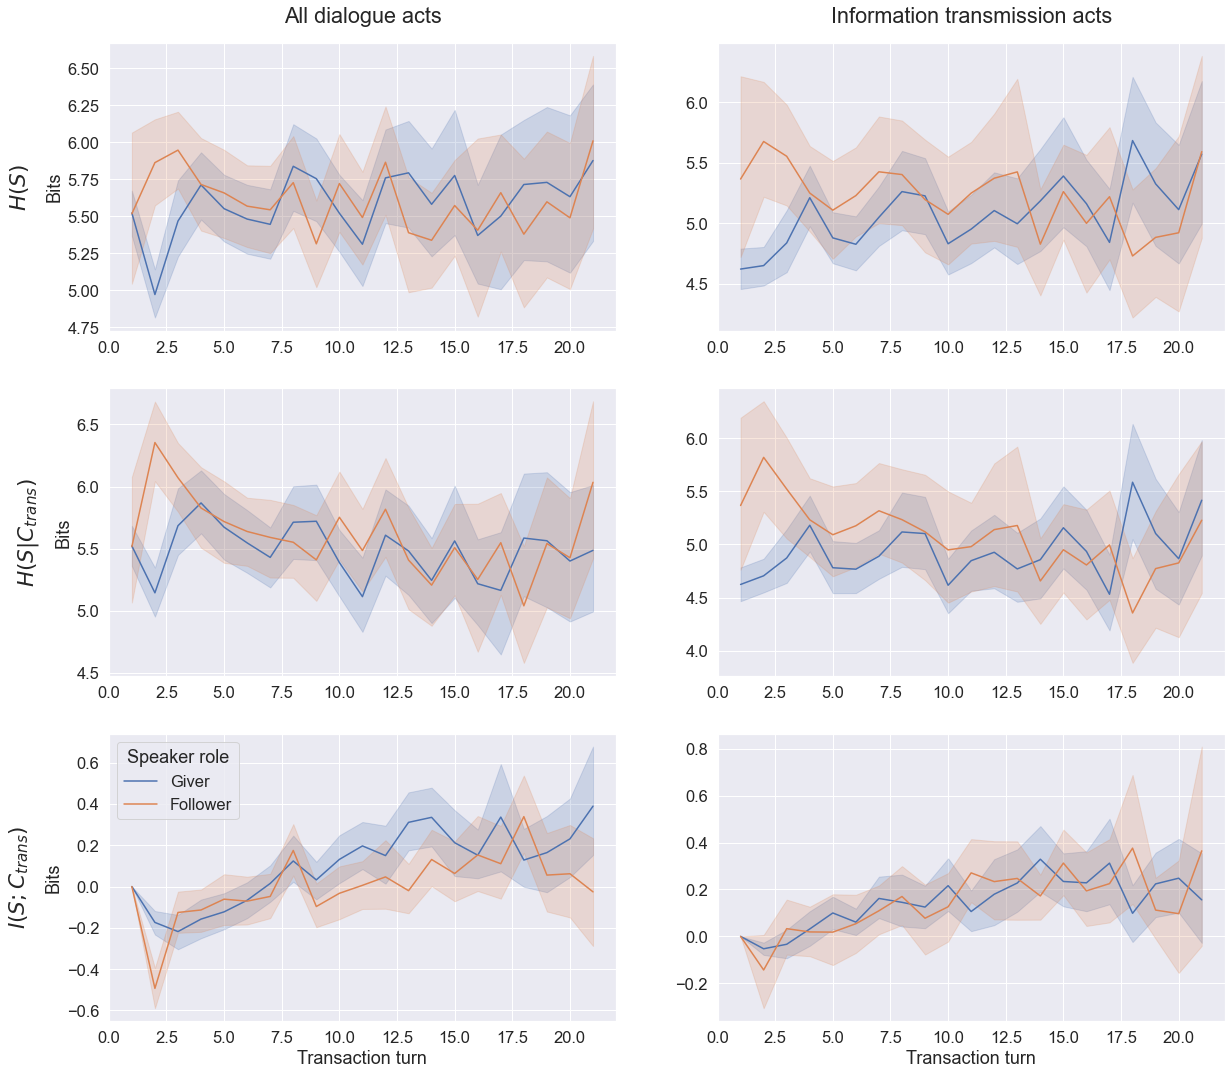

In [139]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Set up figure
cols = ["All dialogue acts", "Information transmission acts"]
rows = ["$H(S)$", "$H(S|C_{trans})$", "$I(S;C_{trans})$"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large', pad=20)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)


sns.lineplot(data=mt_,
             x="position_in_transaction", y="normalised_h", legend=False, hue="speaker", ax=axes[0,0])

sns.lineplot(data=mt_info_,
             x="position_in_transaction", y="normalised_h", legend=False, hue="speaker", ax=axes[0,1])

sns.lineplot(data=mt_,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, hue="speaker", ax=axes[1,0])

sns.lineplot(data=mt_info_,
             x="position_in_transaction", y="normalised_h_transaction_number", legend=False, hue="speaker", ax=axes[1,1])

sns.lineplot(data=mt_,
             x="position_in_transaction", y="mi_transaction_number", legend=True, hue="speaker", ax=axes[2,0])

sns.lineplot(data=mt_info_,
             x="position_in_transaction", y="mi_transaction_number", legend=False, hue="speaker", ax=axes[2,1])

# Set labels for whole figure
axes[2,0].set_xlabel("Transaction turn")
axes[2,1].set_xlabel("Transaction turn")
axes[0,0].set_ylabel("Bits")
axes[1,0].set_ylabel("Bits")
axes[2,0].set_ylabel("Bits")
for i in range(3):
    axes[i, 1].set_ylabel("")
for i in range(2):
    axes[0, i].set_xlabel("")
    axes[1, i].set_xlabel("")

axes[2,0].legend_.set_title("Speaker role")
for t, l in zip(axes[2,0].legend_.texts, ['Giver', 'Follower']):
    t.set_text(l)

plt.show()